In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize, LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder

! pip install dataframe_image
import dataframe_image as dfi

In [78]:
# load data 
path = r"C:\Users\lawso\OneDrive\Documents\GitHub\DS-3001\labs\data.csv" 
data_df = pd.read_csv(path)
data_df.shape

(569, 33)

In [79]:
# Drop id and Unnamed columns
data_df.drop(columns=["id", "Unnamed: 32"], inplace=True)

# saving a version with diagnosis
with_diagnosis = data_df

In [80]:
# dropping the diagnosis column for the k means cluster
# data_df.drop(columns=["diagnosis"], inplace=True)

In [81]:
# Normalize the data to have a mean of 0 and st. dev of 1
for col in data_df.columns[1:]:
    scaler = StandardScaler()
    data_df[col] = scaler.fit_transform(data_df[[col]])

data_df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [82]:
# scaling all columns to have a range of [0, 1]

for col in data_df.columns[1:]:
    scaler = MinMaxScaler()
    data_df[col] = scaler.fit_transform(data_df[[col]])

data_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,M,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,M,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,M,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,M,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [83]:
# Encode diagnosis column (M = 1, B = 0, using LabelEncoder)
diagnosis_values = data_df["diagnosis"].values
le = LabelEncoder()
diagnosis_values = le.fit_transform(diagnosis_values)
data_df["diagnosis"] = diagnosis_values

data_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [ ]:
# initiating X and y data frames for SMOTE
X = data_df.drop(columns=['diagnosis'], axis = 1)
y = data_df['diagnosis']

# Resample using SMOTE
smote = SMOTE(random_state=42)
X_df, y_target = smote.fit_resample(X, y)




,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [85]:
# initializing 5 component PCA
pca = PCA(n_components=5, whiten = True, svd_solver = 'covariance_eigh')
X_pca = pca.fit_transform(X_df)

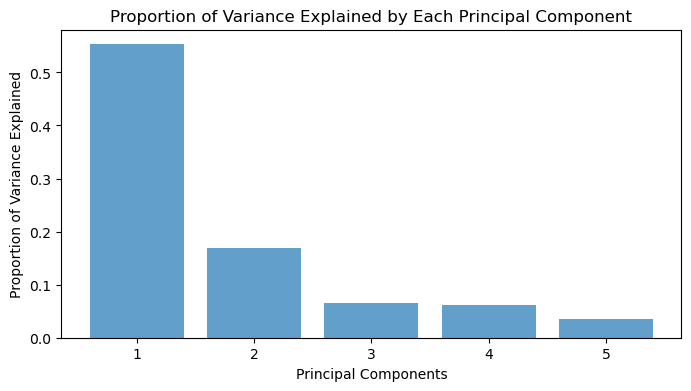

[0.55286747 0.16965928 0.06587383 0.06190696 0.03557538]


In [86]:
# Calculate the proportion of variance explained by each component
proportion_variance = pca.explained_variance_ratio_

# Plotting the proportion of variance explained by each principal component
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(proportion_variance) + 1), proportion_variance, alpha=0.7, label='Individual explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.title('Proportion of Variance Explained by Each Principal Component')
plt.show()

print(proportion_variance)

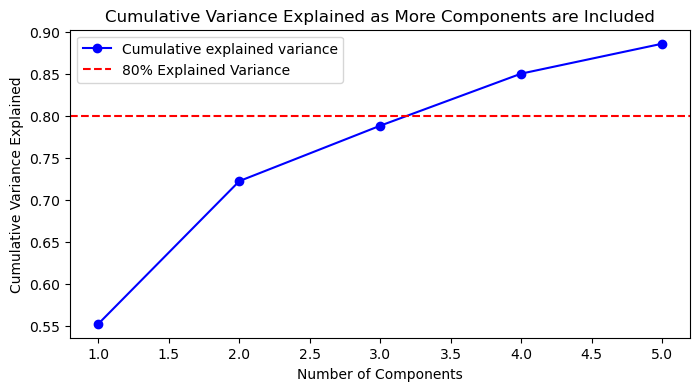

In [105]:
# Calculate cumulative variance
cumulative_variance = np.cumsum(proportion_variance)

# Plotting the cumulative variance explained
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b', label='Cumulative explained variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained as More Components are Included')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% Explained Variance')
plt.legend()
plt.show()

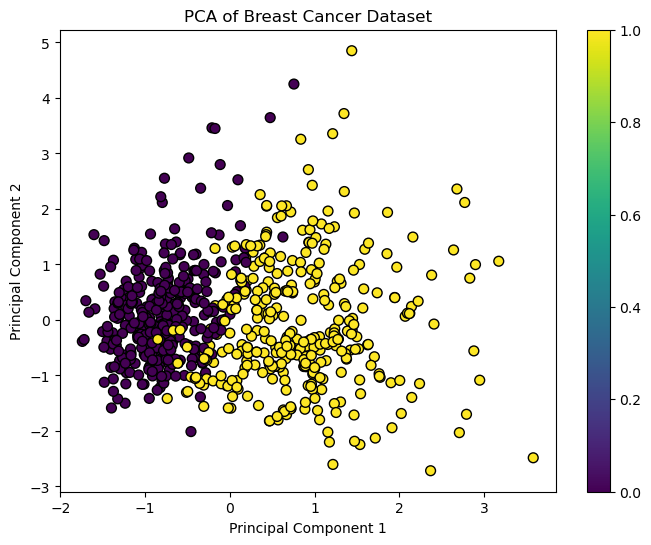

In [88]:
# Plotting the results between the top two components
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_target , cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Breast Cancer Dataset')
plt.colorbar(scatter)
plt.show()

In [94]:

# making a data frame of the components from the PCA and their features
components_df = pd.DataFrame(pca.components_, columns = X_df.columns, index=['PC-{}'.format(i+1) for i in range(pca.n_components_)])

components_df.style \
  .format(precision=3, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) \

components_df.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
PC-1,0.251258,0.092835,0.260823,0.224866,0.104485,0.235416,0.299461,0.327010,0.110060,0.033251,...,0.268637,0.107336,0.268545,0.214901,0.115914,0.195813,0.234447,0.365810,0.094632,0.084017
PC-2,-0.255467,-0.052410,-0.231500,-0.229900,0.206135,0.224147,0.125982,0.005170,0.215343,0.399082,...,-0.241167,-0.030179,-0.206095,-0.200978,0.240565,0.210011,0.164939,0.065860,0.162417,0.262943
PC-3,-0.066833,0.564031,-0.069433,-0.071742,-0.089388,-0.055257,-0.066249,-0.109702,-0.068805,-0.049774,...,-0.011109,0.708446,-0.012814,-0.016194,0.092619,0.106509,0.083414,0.017052,0.060877,0.087610


In [ ]:
drop_column1 = ['texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean','radius_mean', 'perimeter_mean', 'area_mean', 'fractal_dimension_mean']
no_mean_df = components_df.drop(drop_column1, axis = 1)

# creating the df for the worst values for components
drop_column2 = ["radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se"]
worst_df = no_mean_df.drop(drop_column2, axis = 1)
worst_df.head()

# creating the df for the standard error values for components
drop_columns3 = [ "radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]
se_df = no_mean_df.drop(drop_columns3, axis = 1) 
se_df.head()

# creating the df for the mean values for components
mean_df = components_df.drop(drop_column2, axis = 1)
mean_df = mean_df.drop(drop_columns3, axis = 1)

In [ ]:
''' This is for the purpose of easy comparison amongst each marigin'''


In [ ]:
# making a df of the most impactful features on the first two PCs
worst_drop = ['texture_worst', 'compactness_worst', 'area_worst', 'symmetry_worst', 'smoothness_worst', 'fractal_dimension_worst', 'concavity_worst']
worst_show = worst_df.drop(worst_drop, axis = 1)
worst_show.head()


,radius_worst,perimeter_worst,concave points_worst
PC-1,0.268637,0.268545,0.365810
PC-2,-0.241167,-0.206095,0.065860
PC-3,-0.011109,-0.012814,0.017052
PC-4,-0.045183,-0.031781,-0.239876
PC-5,0.050171,0.020497,-0.061940


In [ ]:
# making a df of the most impactful features on the first two PCs
mean_drop = ['texture_mean', 'concavity_mean', 'area_mean', 'perimeter_mean', 'symmetry_mean', 'smoothness_mean', 'compactness_mean']
mean_show = mean_df.drop(mean_drop, axis = 1)
mean_show.head()

,radius_mean,concave points_mean,fractal_dimension_mean
PC-1,0.251258,0.327010,0.033251
PC-2,-0.255467,0.005170,0.399082
PC-3,-0.066833,-0.109702,-0.049774
PC-4,0.011245,0.029532,0.063413
PC-5,0.001149,0.109627,0.018217


In [ ]:
# making a df of the most impactful features on the first two PCs
se_drop = ['texture_se', 'concavity_se', 'area_se', 'perimeter_se', 'symmetry_se', 'smoothness_se', 'radius_se']
se_show = se_df.drop(se_drop, axis = 1)
se_show.head()

,compactness_se,concave points_se,fractal_dimension_se
PC-1,0.119489,0.118890,0.038878
PC-2,0.212479,0.100949,0.159095
PC-3,-0.044283,-0.110103,-0.048950
PC-4,0.270503,0.257850,0.200996
PC-5,-0.325942,-0.134166,-0.172512
